In [1]:
from lstm_module import LSTM_SS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/shail/Desktop/standarddataset/daily-total-female-births.csv', parse_dates=True)
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#df.index.freq='MS'

In [3]:
train = df.iloc[:334]
test = df.iloc[334:]

scaler = MinMaxScaler()

In [4]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

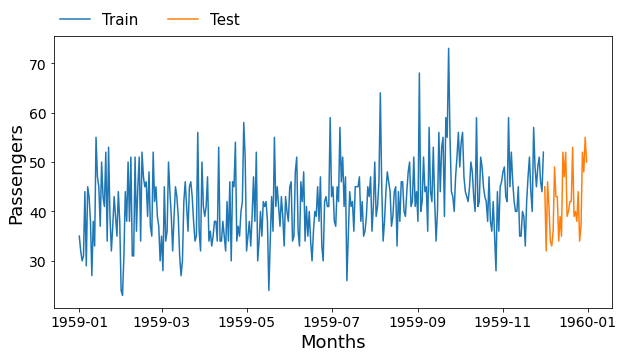

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')

plt.xlabel('Months', fontsize=18)
plt.ylabel('Passengers', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, 
           borderaxespad=0, frameon=False, prop={"size":15})

plt.show()


In [6]:
n_input = 30
n_features = 1

def generate_data(data, n_input):
    X, y = [], []
    for i in range(0,len(data)-n_input):
            X.append(data[i:i+n_input])
            y.append(data[i+n_input])
    return np.array(X), np.array(y)

X, y = generate_data(scaled_train, n_input)

# Original LSTM

In [7]:
model = Sequential()
model.add(LSTM(200, input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X, y, epochs=50, verbose=0)

In [9]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    
test_predictions

[array([0.39478186], dtype=float32),
 array([0.36914283], dtype=float32),
 array([0.35720462], dtype=float32),
 array([0.349406], dtype=float32),
 array([0.34290498], dtype=float32),
 array([0.3354198], dtype=float32),
 array([0.32888332], dtype=float32),
 array([0.32245708], dtype=float32),
 array([0.31727555], dtype=float32),
 array([0.31355342], dtype=float32),
 array([0.31122038], dtype=float32),
 array([0.3099869], dtype=float32),
 array([0.30921933], dtype=float32),
 array([0.30947354], dtype=float32),
 array([0.30998263], dtype=float32),
 array([0.31015992], dtype=float32),
 array([0.31012207], dtype=float32),
 array([0.31012675], dtype=float32),
 array([0.30942217], dtype=float32),
 array([0.3081418], dtype=float32),
 array([0.30638117], dtype=float32),
 array([0.30479792], dtype=float32),
 array([0.30346283], dtype=float32),
 array([0.30139807], dtype=float32),
 array([0.29964876], dtype=float32),
 array([0.29821512], dtype=float32),
 array([0.29675755], dtype=float32),
 array

In [10]:
true_predictions = scaler.inverse_transform(test_predictions)

test['original_LSTM'] = true_predictions

<AxesSubplot:xlabel='Date'>

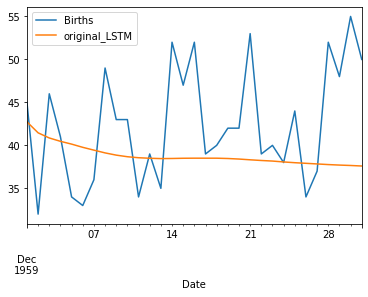

In [11]:
test.plot()

In [12]:
rmse = sqrt(mean_squared_error(test['Births'], test['original_LSTM']))
print(rmse)

7.7937274713983475


In [13]:
test

,Births,original_LSTM
Date,,
1959-12-01,45,42.739093
1959-12-02,32,41.457142
1959-12-03,46,40.860231
1959-12-04,41,40.470300
1959-12-05,34,40.145249
1959-12-06,33,39.770990
1959-12-07,36,39.444166
1959-12-08,49,39.122854
1959-12-09,43,38.863778


# SELF_MADE_LSTM

In [14]:
self_model = LSTM_SS(1, 1, 200, n_input, 0.01)

In [15]:
self_model.fit(50, X, y, verbose=False)

In [16]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = self_model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    
test_predictions

[array([0.43736791]),
 array([0.39962732]),
 array([0.46307751]),
 array([0.40485938]),
 array([0.43049151]),
 array([0.40963512]),
 array([0.4921417]),
 array([0.40681564]),
 array([0.49277161]),
 array([0.44090642]),
 array([0.42207458]),
 array([0.47495841]),
 array([0.35977562]),
 array([0.3878302]),
 array([0.41336493]),
 array([0.38274547]),
 array([0.35668947]),
 array([0.38448099]),
 array([0.45378216]),
 array([0.43252325]),
 array([0.46065178]),
 array([0.43604173]),
 array([0.45221162]),
 array([0.51345671]),
 array([0.38516492]),
 array([0.5202375]),
 array([0.50616384]),
 array([0.41100617]),
 array([0.35904282]),
 array([0.42380994]),
 array([0.49817995])]

In [17]:
true_predictions = scaler.inverse_transform(test_predictions)

test['SELF_MADE_LSTM'] = true_predictions

<AxesSubplot:xlabel='Date'>

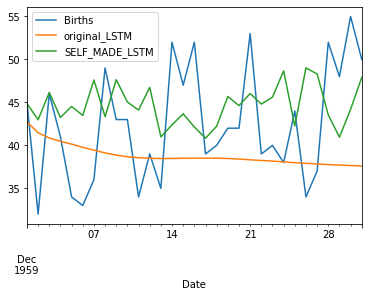

In [18]:
test.plot()

In [19]:
rmse = sqrt(mean_squared_error(test['Births'], test['SELF_MADE_LSTM']))
print(rmse)

7.603888754608517


In [20]:
test

,Births,original_LSTM,SELF_MADE_LSTM
Date,,,
1959-12-01,45,42.739093,44.868396
1959-12-02,32,41.457142,42.981366
1959-12-03,46,40.860231,46.153875
1959-12-04,41,40.470300,43.242969
1959-12-05,34,40.145249,44.524576
1959-12-06,33,39.770990,43.481756
1959-12-07,36,39.444166,47.607085
1959-12-08,49,39.122854,43.340782
1959-12-09,43,38.863778,47.638581
